In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def midpoint(integrand,x_i,x_f,N_bins):
    h_step=np.float32((x_f-x_i)/N_bins)
    sum = 0
    for i in range(N_bins):
        sum+=integrand((i+np.float32(1/2))*h_step + x_i)*h_step
    return sum

def trapezoid(integrand,x_i,x_f,N_bins):
    h_step=np.float32((x_f-x_i)/N_bins)
    sum = 0
    for i in range(N_bins-1):
        sum+=integrand((i+1)*h_step + x_i)*h_step
    return sum + np.float32(1/2)*(integrand(x_f)+integrand(x_i))*h_step

def simpson(integrand,x_i,x_f,N_bins):
    h_step=np.float32((x_f-x_i)/N_bins)
    if N_bins%2!=0:
        raise ValueError("Simpson's Rule requires an even number of bins, but you have specified a non-even number of bins.")
    sum = 0

    for i in range(np.int32(N_bins/2)):
        sum += 4*integrand((2*i+1)*h_step + x_i)

    for i in range(np.int32((N_bins/2) - 1)):
        sum += 2*integrand((2*i+2)*h_step + x_i)
        
    sum += integrand(x_f) + integrand(x_i)
    return sum*(h_step/3)


In [3]:
x_init=np.int32(0)
x_final=np.int32(1)
N_bins=np.int32(1000)

func = lambda t:np.exp(-t,dtype=np.float32)

test = midpoint(func,x_init,x_final,N_bins)
print(test)
test1 = trapezoid(func,x_init,x_final,N_bins)
print(test1)
test2 = simpson(func,x_init,x_final,N_bins)
print(test2)

midpoint_of_N = lambda N : midpoint(func, x_init, x_final, N)
trapez_of_N = lambda N : trapezoid(func, x_init, x_final, N)
simpson_of_N = lambda N : simpson(func, x_init, x_final, N)

true_integral = -(np.exp(-1, dtype=np.float32) - np.exp(-0, dtype=np.float32))

e_rel_calc_midpt = lambda N : np.abs((midpoint_of_N(N)-true_integral)/true_integral,dtype=np.float32)
e_rel_calc_trapz = lambda N : np.abs((trapez_of_N(N)-true_integral)/true_integral,dtype=np.float32)
e_rel_calc_simps = lambda N : np.abs((simpson_of_N(N)-true_integral)/true_integral,dtype=np.float32)


0.6321207
0.63212067
0.6321209


In [4]:
N_samples = 1e2
N_array = 2*np.logspace(0,5,int(N_samples),dtype=np.int32)

mid_array = np.zeros(int(N_samples))
tra_array = np.zeros(int(N_samples))
sim_array = np.zeros(int(N_samples))

for i in range(len(N_array)):
    mid_array[i]=e_rel_calc_midpt(N_array[i])
    tra_array[i]=e_rel_calc_trapz(N_array[i])
    sim_array[i]=e_rel_calc_simps(N_array[i])

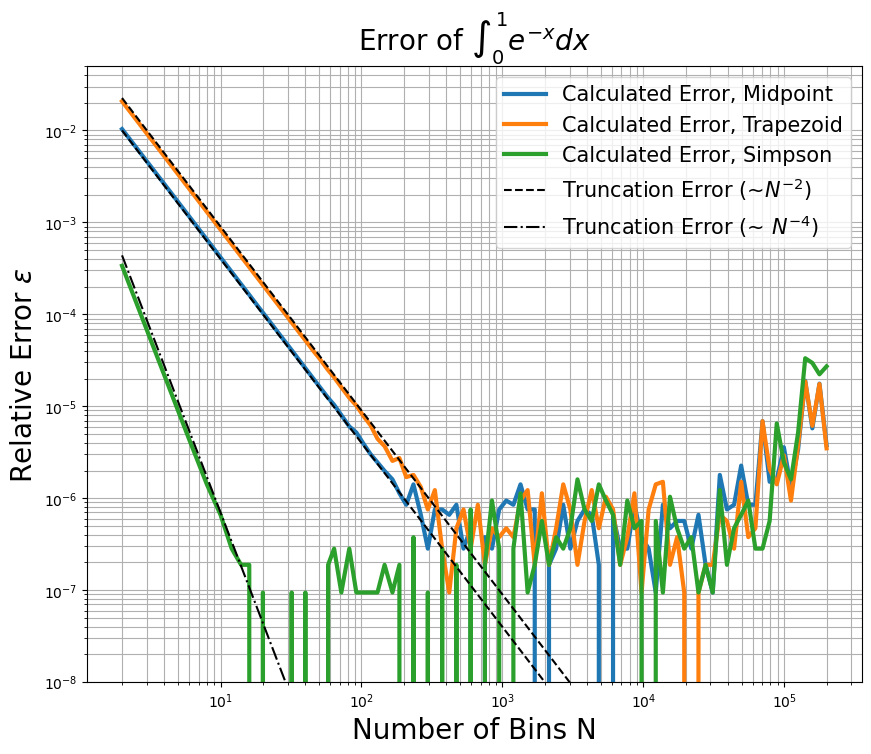

In [8]:
plt.figure(figsize=(10,8),dpi=100)
plt.loglog(N_array,mid_array,label='Calculated Error, Midpoint',lw=3)
plt.loglog(N_array,tra_array,label='Calculated Error, Trapezoid',lw=3)
plt.loglog(N_array,sim_array,label='Calculated Error, Simpson',lw=3)
plt.loglog(N_array,0.09/(N_array**2),label='Truncation Error (~' + r'$N^{-2}$'+')', linestyle='--',color='k')
plt.loglog(N_array,0.04/(N_array**2), linestyle='--',color='k')
plt.loglog(N_array,0.007/(N_array**4),label='Truncation Error (~' + r'$~N^{-4}$'+')', linestyle='-.',color='k')
plt.ylim(1e-8,5e-2)
plt.grid(True,which='both')
plt.xlabel('Number of Bins N',fontsize=20)
plt.ylabel(r'Relative Error $\epsilon$',fontsize=20)
plt.title(r'Error of $\int_{0}^{1} e^{-x} dx$',fontsize=20,pad=10)
plt.legend(fontsize=15,loc='upper right')
plt.tick_params(labelbottom=True)
plt.tick_params(labelleft=True)